In [1]:
from log_3_mcx import log3_cnx, access_polylog_depth
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
import numpy as np
import scipy

# Comparison of circuit depths for methods involving a single or no ancilla

In [2]:
barenco_one = lambda n : 48*n-148
gidney = lambda n : 494*n-1413

In [3]:
xrange = np.logspace(1, 7, 50)
barenco_one_depth = barenco_one(xrange)
gidney_depth = gidney(xrange)
np.save('data/barenco_one_depth.npy', barenco_one_depth)
np.save('data/gidney_depth.npy',gidney_depth)

Comment. The circuit depths are computed recursively during the circuit compilation. Computing the circuit depths using the standard .depth() method on the compiled final circuit leads to much longer computation times.

In [3]:
depths = []

for n in xrange:
    ncontrol = int(n)
    nqubits = ncontrol+2
    gate = log3_cnx(ncontrol=ncontrol, trace_depth_and_size=True)
    d = access_polylog_depth(ncontrol)
    depths.append(d)

10 337
13 470
17 662
23 950
30 1297
40 1772
54 2186
71 2696
95 3228
126 4070
167 4690
222 5650
294 6756
390 8210
517 9244
686 11002
910 12366
1206 13744
1599 16172
2120 17532
2811 20428
3727 21892
4941 24552
6551 26532
8685 29664
11513 33236
15264 36636
20235 38344
26826 43504
35564 47072
47148 50940
62505 54988
82864 58668
109854 67624
145634 71944
193069 75380
255954 80892
339322 85964
449843 95892
596362 100396
790604 106484
1048113 113400
1389495 118592
1842069 134744
2442053 137888
3237457 143536
4291934 151136
5689866 157488
7543120 174272
10000000 175456


In [5]:
np.save('data/log3_depth.npy', depths)
np.save('data/x_axis.npy', xrange)

In [3]:
silva_depth = [690, 790, 1586, 2042, 3610, 4410, 5258, 4702, 4756, 4798, 4852, 4894, 4948, 4990, 5044, 5086, 5140, 5182, 5236, 5278, 5332, 5374, 5428, 5470]
range7 = list(range(26, 50))
ext_range = np.linspace(50, 10**7, 100)
fit = np.polyfit(range7[-5:], silva_depth[-5:],1)
print(fit)
ext_data = np.polyval(fit, ext_range)
silva_range = range7+list(ext_range)
silva_depth = silva_depth+list(ext_data)
np.save('data/silva_range.npy', silva_range)
np.save('data/silva_depth.npy', silva_depth)

[  48.  3120.4]


In [ ]:
from qclib_master.qclib.gates.mcu import MCU
from qiskit.circuit.library import XGate
x = np.array([[0,1],[1,0]])
error = 1e-7
ncontrol = xrange
depths = []
for n in ncontrol[4:]:
    nc = int(n)
    mcx = MCU(x, nc, error)
    qc = QuantumCircuit(nc+1)
    qc.append(mcx, range(nc+1))
    qct = transpile(qc, basis_gates=['u', 'cx'])
    depths.append(qct.depth())
    print(nc, depths)

30 [3610]
40 [3610, 5044]
54 [3610, 5044, 5716]
71 [3610, 5044, 5716, 6530]
95 [3610, 5044, 5716, 6530, 7796]
126 [3610, 5044, 5716, 6530, 7796, 9788]
167 [3610, 5044, 5716, 6530, 7796, 9788, 12399]
222 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932]
294 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540]
390 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684]
517 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799]
686 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628]
910 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964]
1206 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964, 78908]
1599 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964, 78908, 104047]
2120 [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964, 78908, 104047, 137404]
2811 [3610, 5044, 5716, 6530, 7796, 9788, 12399,

# Proposition 2

In [4]:
epsilon = 1./10**7
cutoff = int(np.ceil(np.log2(np.pi/epsilon)))
approx_depths = []
for n in xrange[25:]:
    print('computing', n)
    ncontrol = int(n)
    d = 0
    for k in range(1, min([cutoff+1, ncontrol])):
        local = ncontrol - k
        localp = int(np.floor(np.sqrt(local)))
        nqubits = local+2
        gate = log3_cnx(ncontrol=local, trace_depth_and_size=True)
        d += 2*access_polylog_depth(local)+10-2*access_polylog_depth(localp)
    approx_depths.append(d)
    print(ncontrol, approx_depths)

computing 11513.95399326448
11513 [1479250]
computing 15264.179671752334
15264 [1479250, 1628550]
computing 20235.896477251554
20235 [1479250, 1628550, 1708050]
computing 26826.957952797275
26826 [1479250, 1628550, 1708050, 1940950]
computing 35564.80306223129
35564 [1479250, 1628550, 1708050, 1940950, 2096450]
computing 47148.663634573895
47148 [1479250, 1628550, 1708050, 1940950, 2096450, 2264750]
computing 62505.51925273976
62505 [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250]
computing 82864.27728546843
82864 [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250, 2603250]
computing 109854.11419875572
109854 [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250, 2603250, 2997350]
computing 145634.84775012443
145634 [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250, 2603250, 2997350, 3186950]
computing 193069.77288832495


KeyboardInterrupt: 

In [ ]:
print(cutoff)

# Fit

In [28]:
xdata = [np.log(n)**3 for n in xrange]
fit = np.polyfit(xdata, depths, 1)
print(fit)

[   43.02638831 -1287.18689503]


# Ancillae 100

In [2]:
from polylog_mcx import one_ancilla_mcx
# Barenco one zeroed
nc = 100
depth_one_clean_ancilla = 36*100-111
# Barenco v chain
depth_v_chain = 12*nc-12
# He
depth_he = 16*np.ceil(np.log2(100))+12
dhe = lambda n : 16*np.ceil(np.log2(n))+12
# Prop1
for k in range(1, nc+1):
    log3_cnx(k, True)
zeroed = [0]+[access_polylog_depth(n) for n in range(1,5)]
for n in range(5, nc+1):
    p = int(np.floor(np.sqrt(n)))
    zeroed.append(.5*access_polylog_depth(n)+access_polylog_depth(2*p))
prop3 = [zeroed[nc]]
for k in range(2, nc):
    prop3.append(min([min(prop3),2*zeroed[int(np.floor(2*n/k))]+dhe(np.floor(k/2))]))
prop3.append(depth_he)
np.save('data/ancillae_100.npy', prop3)

# Ancillae 10000

In [2]:
from polylog_mcx import one_ancilla_mcx
# Barenco one zeroed
nc = 10**5
depth_one_clean_ancilla = 36*nc-111
# Barenco v chain
depth_v_chain = 12*nc-12
# He
depth_he = 16*np.ceil(np.log2(nc))+12
dhe = lambda n : 16*np.ceil(np.log2(n))+12
# Prop1
p = int(np.floor(np.sqrt(nc)))
print('here')
_ = log3_cnx(2*p, True)
_ = log3_cnx(nc, True)
prop3 = [.5*access_polylog_depth(nc)+access_polylog_depth(2*p)]
krange = [int(k) for k in list(np.logspace(1, 5, 50))]
for k in krange:
    blocsize = int(np.ceil(2*nc/k))
    p = int(np.floor(np.sqrt(blocsize)))
    print(k)
    _ = log3_cnx(2*p, True)
    _ = log3_cnx(blocsize, True)
    z = .5*access_polylog_depth(blocsize)+access_polylog_depth(2*p)
    prop3.append(min([min(prop3),2*z+dhe(np.floor(k/2))]))
prop3.append(depth_he)
np.save('data/ancillae_100000.npy', prop3)

here
10
12
14
17
21
25
30
37
44
54
65
79
95
115
138
167
202
244
294
355
429
517
625
754
910
1098
1325
1599
1930
2329
2811
3393
4094
4941
5963
7196
8685
10481
12648
15264
18420
22229
26826
32374
39069
47148
56898
68664
82864
100000


# Compare controlled-$\mathsf{SU}(2)$ gates

In [25]:
from qclib_master.qclib.gates.ldmcsu import Ldmcsu, LdMcSpecialUnitary
import numpy as np
from qiskit import QuantumCircuit
from qiskit.compiler import transpile

nrange = range(11, 31)
da_silva_su2 = []
qc_circuit_for_isometries = []
W = np.matrix([[np.exp(1j*np.pi/4.), 0],[0, np.exp(-1.j*np.pi/4.)]])
for n in nrange:
    # Decomposition of Multi-controlled Special Unitary Single-Qubit Gates https://arxiv.org/pdf/2302.06377.pdf
    qc = QuantumCircuit(n+1)
    gate = Ldmcsu(W, n)
    qc.append(gate, list(range(n+1)))
    qc = transpile(qc, basis_gates=['u', 'cx'])
    da_silva_su2.append(qc.depth())
    # Quantum Circuit for isometries https://arxiv.org/pdf/1501.06911.pdf
    qc = QuantumCircuit(n+1)
    gate = LdMcSpecialUnitary(W, n)
    qc.append(gate, list(range(n+1)))
    qc = transpile(qc, basis_gates=['u', 'cx'])
    qc_circuit_for_isometries.append(qc.depth())

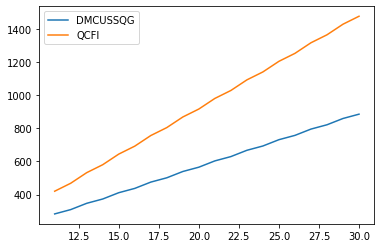

In [26]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(nrange, da_silva_su2, label='DMCUSSQG')
plt.plot(nrange, qc_circuit_for_isometries, label='QCFI')
plt.legend()

In [27]:
da_silva_su2_fit = np.polyfit(nrange, da_silva_su2, 1)
print(da_silva_su2_fit)
qcfi_fit = np.polyfit(nrange, qc_circuit_for_isometries, 1)
print(qcfi_fit)

[ 31.95488722 -71.07518797]
[  55.93984962 -198.76691729]
